# SETUP

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
link = 'https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_komentar_instagram_cyberbullying.csv'

In [ ]:
data = pd.read_csv(link)
data.head()

,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


In [ ]:
# Eksplorasi data untuk mengetahui sebaran data
print('Comments count:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] Negative\t:', data[data.Sentiment == 'negative'].shape[0], 'data')
print('-- [1] Positive\t:', data[data.Sentiment == 'positive'].shape[0], 'data')

Jumlah komentar: 400 data

terdiri dari (label):
-- [0] Negative	: 200 data
-- [1] Positive	: 200 data


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      400 non-null    int64 
 1   Sentiment               400 non-null    object
 2   Instagram Comment Text  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


In [ ]:
# Merubah nama kolom
data = data.rename(columns={'Id': 'id', 'Sentiment': 'label', 'Instagram Comment Text': 'text'})
# Konversi Label dari String ke Interger
data['label'] = data['label'].replace({'positive': 1, 'negative': 0})

data

,id,label,text
0,1,0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,0,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,0,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,0,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,0,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...,...
395,396,1,Bangga sama suami yg selalu ingat istri disela...
396,397,1,Apaoun pekerjaannya yg penting halal u tuk men...
397,398,1,Gojek itu mayoritas pegangguran yang lama gak ...
398,399,1,<USERNAME> aslinya cantik dan ayu loh mbak kr...


# PREPROCESSING

# Case Folding

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [ ]:
raw_sample = data['text'].iloc[225]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  Cantik yang ini dong,penampilannya dewasa yang sesuai. Mukanya cantik Indonesia,classy. Ayu ayu gimana gitu.
Case folding	:  cantik yang ini dongpenampilannya dewasa yang sesuai mukanya cantik indonesiaclassy ayu ayu gimana gitu


## Word Normalization

In [ ]:
link_norm = 'https://raw.githubusercontent.com/haris0/SentimentStreamlit/master/key_norm.csv'

In [ ]:
key_norm = pd.read_csv(link_norm)
print(key_norm.head())

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi


(3721, 3)

In [ ]:
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')
stopwords_ind[:10]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir']

In [ ]:
len(stopwords_ind)

758

In [ ]:
# Buat fungsi untuk langkah stopword removal
def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = data['text'].iloc[225]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  Cantik yang ini dong,penampilannya dewasa yang sesuai. Mukanya cantik Indonesia,classy. Ayu ayu gimana gitu.
Case folding		:  cantik yang ini dongpenampilannya dewasa yang sesuai mukanya cantik indonesiaclassy ayu ayu gimana gitu
Stopword removal	:  cantik dongpenampilannya dewasa sesuai mukanya cantik indonesiaclassy ayu ayu gimana gitu


## Stemming

In [ ]:
!pip -q install sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = data['text'].iloc[225]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Cantik yang ini dong,penampilannya dewasa yang sesuai. Mukanya cantik Indonesia,classy. Ayu ayu gimana gitu.
Case folding		:  cantik yang ini dongpenampilannya dewasa yang sesuai mukanya cantik indonesiaclassy ayu ayu gimana gitu
Stopword removal	:  cantik dongpenampilannya dewasa sesuai mukanya cantik indonesiaclassy ayu ayu gimana gitu
Stemming		:  cantik dongpenampilannya dewasa sesuai muka cantik indonesiaclassy ayu ayu gimana gitu


## Clean Text Column Addition

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
%%time
data['clean_text'] = data['text'].apply(text_preprocessing_process)

CPU times: total: 2min 17s
Wall time: 3min 47s


In [ ]:
data

,id,label,text,clean_text
0,1,0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,username tolol hubung nya gugur pakai hijab sy...
1,2,0,Geblek lo tata...cowo bgt dibela2in balikan......,bodoh tatacowo banget bain balikanhadewwntar t...
2,3,0,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kemarin mewek skr lengket duhhh labil banget s...
3,4,0,"Intinya kalau kesel dengan ATT nya, gausah ke ...",inti kesel att nya anak kasihan kembang psikis...
4,5,0,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan lgsakit jiwaknp peran utama...
...,...,...,...,...
395,396,1,Bangga sama suami yg selalu ingat istri disela...,bangga suami istri sela apa profesi kau juara ...
396,397,1,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun kerja halal tuk nafkah keluarga semangat
397,398,1,Gojek itu mayoritas pegangguran yang lama gak ...,gojek mayoritas pegangguran kerja putus asaa t...
398,399,1,<USERNAME> aslinya cantik dan ayu loh mbak kr...,username asli cantik ayu loh mbak temu langsun...


# FEATURE EXTRACTION & MODELLING

### TF-IDF for Naive Bayes Modelling

###### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf_model = TfidfVectorizer()
tfidf_vectors = tfidf_model.fit_transform(data['clean_text'])

tfidf_vectors

<400x2315 sparse matrix of type '<class 'numpy.float64'>'
	with 5198 stored elements in Compressed Sparse Row format>

In [ ]:
print(tfidf_vectors.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##### Chi Square Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_labels = np.array(data['label'])

# Feature selection for tfidf_vectors
selector = SelectKBest(chi2, k=100)
tfidf_vectors_selected = selector.fit_transform(tfidf_vectors, data_labels)
tfidf_feature_names = tfidf_model.get_feature_names_out()
tfidf_features_selected = np.array(tfidf_feature_names)[selector.get_support()]

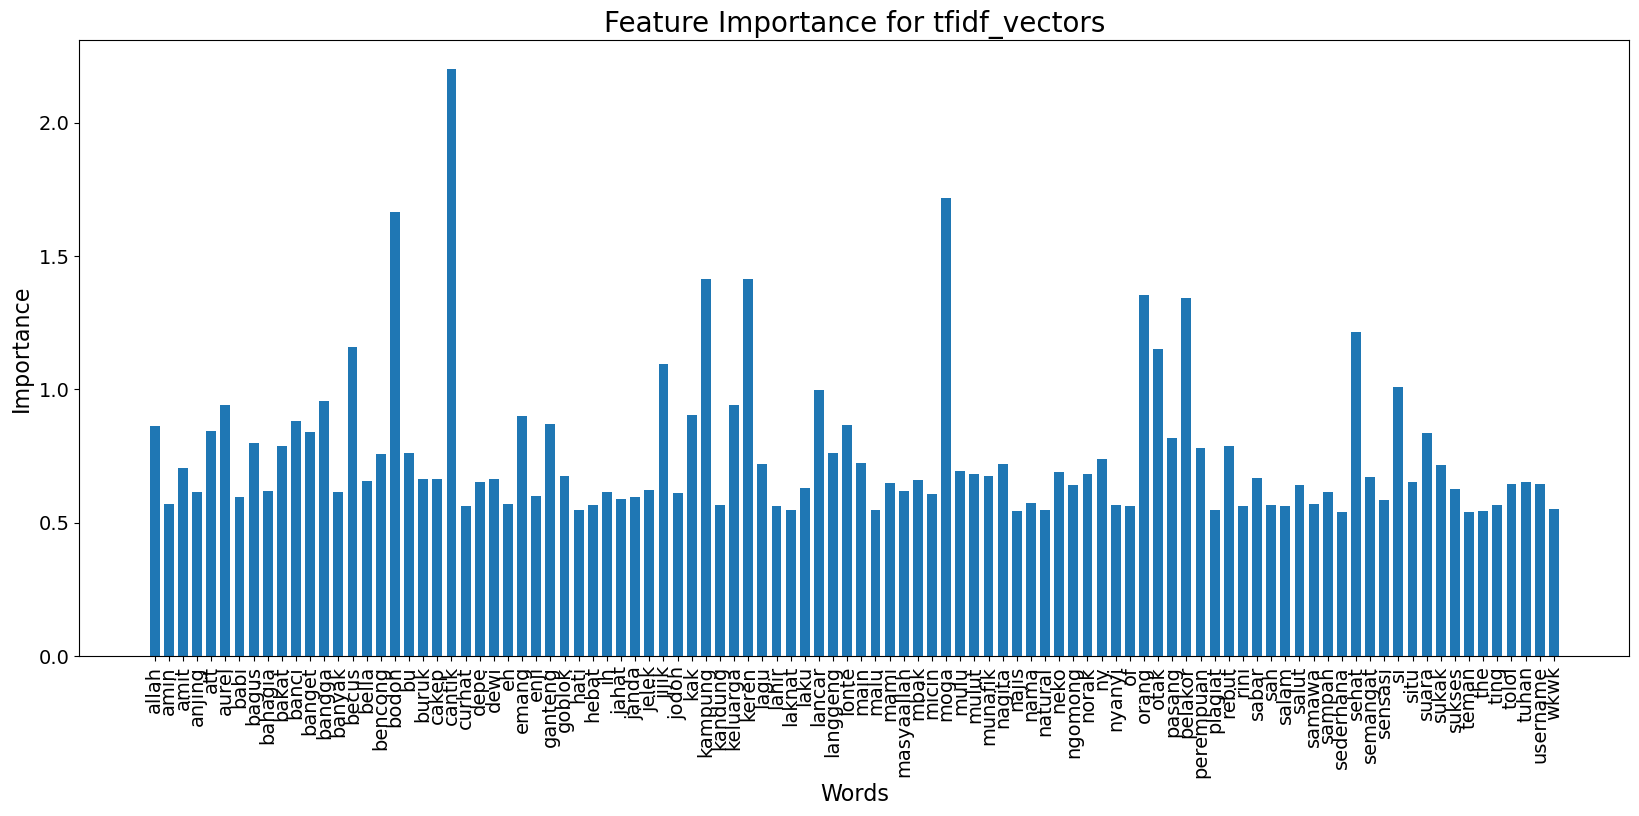

In [ ]:
# Visualize feature importance for tfidf_vectors
scores = -np.log10(selector.pvalues_)
plt.figure(figsize=(20, 8))
plt.bar(range(len(tfidf_features_selected)), scores[selector.get_support()], width=0.7)
plt.xticks(range(len(tfidf_features_selected)), tfidf_features_selected, rotation=90)
plt.xlabel('Words', fontsize=16)
plt.ylabel('Importance', fontsize=16)
plt.title('Feature Importance for tfidf_vectors', fontsize=20)
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
X_tfidf = tfidf_vectors.toarray()
data_tf_idf = pd.DataFrame(X_tfidf, columns=tfidf_model.get_feature_names_out())

data_tf_idf.head()

,aamiin,aammiinnn,abal,abang,abbey,abege,abiiis,abiss,abu,ac,...,yh,yoo,youtube,yra,yuk,yutub,zaman,zholimi,zina,zzzzz
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.237377,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_tf_idf.shape

(400, 2315)

##### Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# membuat target vector
target = np.array(data['label'])

# membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors_selected, target, test_size=0.2, random_state=42)

# membuat model Naive Bayes
model = BernoulliNB()

# melatih model dengan data latih
model.fit(X_train, y_train)

BernoulliNB()

In [ ]:
# melakukan prediksi pada data uji
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [ ]:
y_test

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [ ]:
# membuat laporan klasifikasi
cr = classification_report(y_test, y_pred)

print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        44
           1       0.88      1.00      0.94        36

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.94      0.94        80



In [ ]:
# menghitung akurasi model
accuracy = model.score(X_test, y_test)

# menampilkan nilai akurasi
print("Naive Bayes Accuracy:", '{:.2%}'.format(accuracy))

Naive Bayes Accuracy: 93.75%


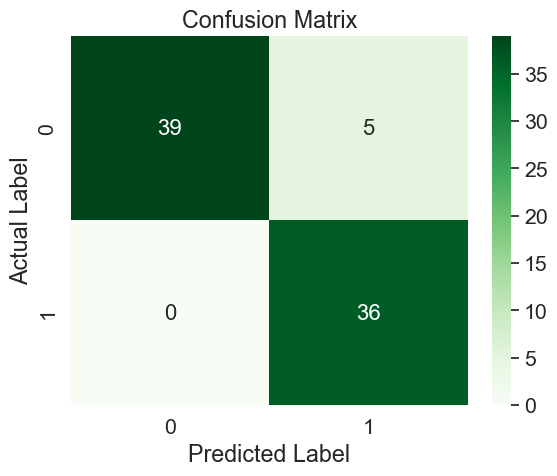

In [ ]:
import seaborn as sns
# membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# membuat confusion matrix plot
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap="Greens", fmt="d")

plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### Glove Embedding for CNN

In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
# set parameters
max_sequence_length = 1000
max_num_words = 2000
embedding_dim = 100
test_size = 0.2

In [ ]:
# tokenize text
tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(data['clean_text'])
sequences = tokenizer.texts_to_sequences(data['clean_text'])

In [ ]:
# pad sequences
word_index = tokenizer.word_index
data_pad = pad_sequences(sequences, maxlen=max_sequence_length)

In [ ]:
# split data into train and test sets
labels = data['label']
x_train, x_test, y_train, y_test = train_test_split(data_pad, labels, test_size=test_size, random_state=42)

In [ ]:
# load GloVe embeddings
embeddings_index = {}
with open('glove.6B.' + str(embedding_dim) + 'd.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
# create embedding matrix
num_words = min(max_num_words, len(word_index))
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.47073999, -0.10449   , -0.14195   , ..., -0.13700999,
        -0.72784001,  0.052566  ],
       [ 0.24788   , -0.53342998,  0.52853   , ..., -0.71711999,
         0.2527    , -0.0031784 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# create model
model = Sequential()
model.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(35))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         200000    
                                                                 
 conv1d (Conv1D)             (None, 996, 128)          64128     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 199, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 195, 128)          82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 39, 128)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 35, 128)           8

In [ ]:
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train model
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=128, callbacks=[early_stop])

Epoch 1/20
3/3 [==============================] - 7s 1s/step - loss: 0.6867 - accuracy: 0.5406 - val_loss: 0.6635 - val_accuracy: 0.6875
Epoch 2/20
3/3 [==============================] - 3s 937ms/step - loss: 0.6650 - accuracy: 0.6094 - val_loss: 0.6496 - val_accuracy: 0.7125
Epoch 3/20
3/3 [==============================] - 3s 829ms/step - loss: 0.6506 - accuracy: 0.6562 - val_loss: 0.6694 - val_accuracy: 0.6375
Epoch 4/20
3/3 [==============================] - 2s 772ms/step - loss: 0.6218 - accuracy: 0.6719 - val_loss: 0.6090 - val_accuracy: 0.6875
Epoch 5/20
3/3 [==============================] - 3s 922ms/step - loss: 0.5766 - accuracy: 0.7094 - val_loss: 0.6128 - val_accuracy: 0.6750
Epoch 6/20
3/3 [==============================] - 3s 1s/step - loss: 0.4986 - accuracy: 0.7937 - val_loss: 0.5617 - val_accuracy: 0.7250
Epoch 7/20
3/3 [==============================] - 3s 977ms/step - loss: 0.4034 - accuracy: 0.8500 - val_loss: 0.5732 - val_accuracy: 0.6750
Epoch 8/20
3/3 [==========

In [ ]:
# evaluate model
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

3/3 [==============================] - 0s 76ms/step - loss: 0.6596 - accuracy: 0.7250
Test Loss: 0.6595926880836487
Test Accuracy: 0.7250000238418579


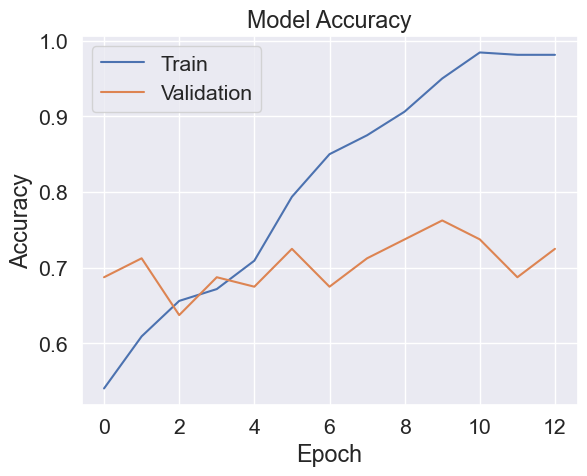

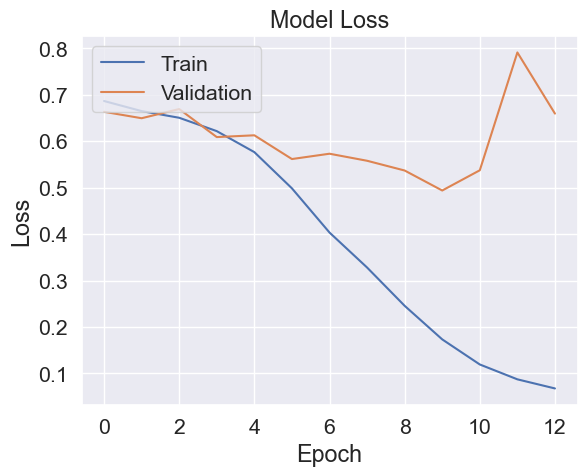

In [ ]:
import matplotlib.pyplot as plt

# membuat grafik untuk akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# membuat grafik untuk loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Model
pertama yaitu Naive Bayes dengan featur extraction TF IDF, menghasilkan akurasi dalam penentuan
polaritas untuk analisis sentimen sebesar 93.75% Sedangkan akurasi yang dihasilkan model kedua CNN
dengan GloVe Word Embedding adalah sebesar 72.5%.

*   Jika data teks relatif pendek Model Naive Bayes dengan TF IDF dapat menjadi pilihan yang lebih baik, karena
model ini mampu menghasilkan performa yang baik pada data teks yang pendek.
*   Jika
data teks memiliki struktur yang kompleks Model CNN dengan GloVe Word Embedding dapat menjadi
pilihan yang lebih baik, karena model ini mampu menangani data teks dengan berbagai macam struktur
seperti kalimat, paragraf, dan dokumen.
*   Jika
ingin mempelajari fitur fitur yang kompleks dan subtil pada data teks Model CNN dengan GloVe Word
Embedding dapat menjadi pilihan yang lebih baik, karena model ini lebih mampu dalam mempelajari fitur
fitur yang kompleks dan subtil pada data teks.
*   Jika
ingin menghindari overfitting Model Naive Bayes dengan TF IDF dapat menjadi pilihan yang lebih baik,
karena model ini cenderung lebih tahan terhadap overfitting Namun, harus diperhatikan juga bahwa
performa model ini dapat menurun jika terdapat kata kata yang jarang muncul pada data teks.
*   Jika
ingin mendapatkan representasi kata yang lebih baik Model CNN dengan GloVe Word Embedding dapat
menjadi pilihan yang lebih baik, karena GloVe Word Embedding mampu menghasilkan representasi kata yang
lebih baik dibandingkan dengan representasi yang dihasilkan oleh metode TF IDF.